# Predicting password strength using Machine learning techniques

## Loading data set

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
pswd_data = pd.read_csv(r"C:\Users\PunithaGnanathesigan\Desktop\Library\SSS Project\data.csv", error_bad_lines=False)


C:\Users\PunithaGnanathesigan\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 2810: expected 2 fields, saw 5\nSkipping line 4641: expected 2 fields, saw 5\nSkipping line 7171: expected 2 fields, saw 5\nSkipping line 11220: expected 2 fields, saw 5\nSkipping line 13809: expected 2 fields, saw 5\nSkipping line 14132: expected 2 fields, saw 5\nSkipping line 14293: expected 2 fields, saw 5\nSkipping line 14865: expected 2 fields, saw 5\nSkipping line 17419: expected 2 fields, saw 5\nSkipping line 22801: expected 2 fields, saw 5\nSkipping line 25001: expected 2 fields, saw 5\nSkipping line 26603: expected 2 fields, saw 5\nSkipping line 26742: expected 2 fields, saw 5\nSkipping line 29702: expected 2 fields, saw 5\nSkipping line 32767: expected 2 fields, saw 5\nSkipping line 32878: expected 2 fields, 

In [80]:
pswd_data.head(34)

,password,strength
642298,kd36pkv,0
447227,hCzRckbWx7GUQkEY,2
80415,213360fe,1
232965,descadz12,1
367692,qwaszxcv1,1
260679,lcopb3,0
574369,paradize0,1
579935,wsmwow122333,1
357529,gembul767,1
612229,swin.edu.au,1


In [4]:
#diffirent classes in strength class
pswd_data['strength'].unique()

array([1, 2, 0], dtype=int64)

In [5]:
pswd_data = pswd_data.sample(n=20000)

In [6]:
pswd_data.shape

(20000, 2)

In [7]:
pswd_data.strength.value_counts()

1    14908
0     2674
2     2418
Name: strength, dtype: int64

## Checking missing values

In [8]:
pswd_data.isna().sum()

password    0
strength    0
dtype: int64

In [9]:
pswd_data.shape

(20000, 2)

## Removing missing values

In [10]:
pswd_data.dropna(inplace=True)

## Checking whether missing values removed or not

In [11]:
pswd_data.isna().sum()

password    0
strength    0
dtype: int64

## Convert dataset into array

In [12]:
pswd = np.array(pswd_data)

In [13]:
pswd

array([['kd36pkv', 0],
       ['hCzRckbWx7GUQkEY', 2],
       ['213360fe', 1],
       ...,
       ['qCWrSEzA4MA7YodL', 2],
       ['sergio013', 1],
       ['pokies68', 1]], dtype=object)

## Dataset shuffling

In [14]:
import random

In [15]:
random.shuffle(pswd)

## Adding features and labels

In [16]:
ylabels  = [s[1] for s in pswd]
allpasswords = [s[0] for s in pswd]

In [17]:
len(ylabels)  #checking length of labels

20000

In [18]:
len(allpasswords)   #Checking length of allpasswords

20000

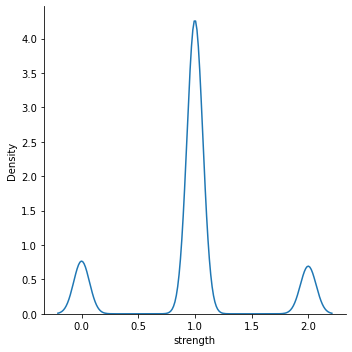

In [19]:
# Distribution of ylabel
sns.displot(pswd_data, x="strength",kind="kde")

## Implementing tokenization

In [20]:
def createTokens(f):
    
    tokens = []
    for i in f:
        tokens.append(i)
    return tokens

## Converting word tokens into numerical data

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

## Initializing CountVectorizer

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer_state = CountVectorizer()

In [23]:
#allpasswords = np.array(allpasswords).reshape(-1,1)

In [37]:
type(allpasswords)

list

In [24]:
X = vectorizer_state.fit_transform(allpasswords)

### PCA

In [25]:
# from sklearn.decomposition import PCA
# principal=PCA(n_components=2000)
# principal.fit(X.todense())
# X=principal.transform(X.todense())
 
# # Check the dimensions of data after PCA
# print(X.shape)

## Splitting vectorized dataset

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, ylabels, test_size=0.2, random_state=42)


In [26]:
print(X_train.shape, X_test.shape) #y_train.shape, y_test.shape)

(16000, 10254) (4000, 10254)


## Building the models

### 1.Decision Tree

In [28]:
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 8, 'min_samples_leaf': 2}
Best score is 0.7465


In [29]:
from sklearn.metrics import accuracy_score
dect_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, max_features = 1, min_samples_leaf = 2)
dect_model.fit(X_train, y_train)
y_test_pred_dect = dect_model.predict(X_test)
y_train_pred_dect = dect_model.predict(X_train)
print(accuracy_score(y_train, y_train_pred_dect))
print(accuracy_score(y_test, y_test_pred_dect))

0.746125
0.75725


In [96]:
# Classification report

from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_pred_dect))
print(classification_report(y_test, y_test_pred_dect))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2173
           1       0.74      1.00      0.85     11775
           2       0.00      0.00      0.00      2052

    accuracy                           0.74     16000
   macro avg       0.25      0.33      0.28     16000
weighted avg       0.54      0.74      0.62     16000

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       529
           1       0.73      1.00      0.84      2926
           2       0.00      0.00      0.00       545

    accuracy                           0.73      4000
   macro avg       0.24      0.33      0.28      4000
weighted avg       0.54      0.73      0.62      4000



C:\Users\PunithaGnanathesigan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PunithaGnanathesigan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PunithaGnanathesigan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\P

<AxesSubplot:>

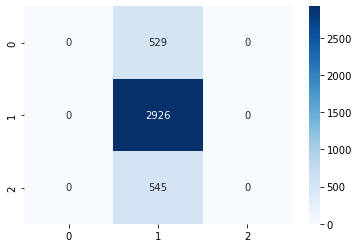

In [97]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_test_pred_dect), annot=True, cmap='Blues', fmt='g')

In [171]:
# ROC-AUC score

from sklearn.metrics import roc_auc_score
roc_auc_score(y_score= dect_model.predict_proba(X_test), y_true= y_test, multi_class='ovr')

0.5

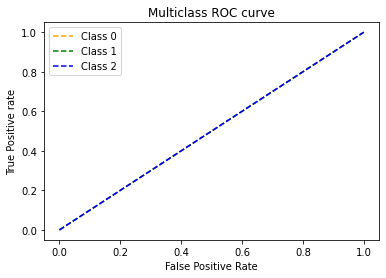

In [152]:
# importing libraries
# multi-class classification
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

pred_prob = dect_model.predict_proba(X_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
# plt.savefig('Multiclass ROC',dpi=300)

### MLPClassifier

In [35]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(max_iter=100)
parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
clf.fit(X_train, y_train)

#print the tuned parameters
print("Tuned MLPClassifier Parameters: {}".format(clf.best_params_))
print("Best score is {}".format(clf.best_score_))




Tuned MLPClassifier Parameters: hidden_layer_sizes=(6,5), random_state=5, verbose=True, learning_rate='adaptive', activation='relu', solver='adam', alpha=0.05


In [57]:
# Create model object
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(6,5),
                    random_state=5,
                    verbose=True,
                    learning_rate='adaptive',
                    activation='relu',
                    solver='adam',
                    alpha=0.05)

# Fit data onto the model
clf.fit(X_train,y_train)
y_test_pred_MLP = clf.predict(X_test)
y_train_pred_MLP = clf.predict(X_train)
print(accuracy_score(y_train, y_train_pred_MLP))
print(accuracy_score(y_test, y_test_pred_MLP))

Iteration 1, loss = 0.86845753
Iteration 2, loss = 0.77395976
Iteration 3, loss = 0.71959089
Iteration 4, loss = 0.66722195
Iteration 5, loss = 0.57583023
Iteration 6, loss = 0.46387411
Iteration 7, loss = 0.37138208
Iteration 8, loss = 0.31250660
Iteration 9, loss = 0.27881346
Iteration 10, loss = 0.25891824
Iteration 11, loss = 0.24600791
Iteration 12, loss = 0.23631345
Iteration 13, loss = 0.22802183
Iteration 14, loss = 0.22004271
Iteration 15, loss = 0.21145337
Iteration 16, loss = 0.20193456
Iteration 17, loss = 0.19101327
Iteration 18, loss = 0.17849572
Iteration 19, loss = 0.16439620
Iteration 20, loss = 0.14948602
Iteration 21, loss = 0.13457912
Iteration 22, loss = 0.12066418
Iteration 23, loss = 0.10838194
Iteration 24, loss = 0.09798812
Iteration 25, loss = 0.08940327
Iteration 26, loss = 0.08244442
Iteration 27, loss = 0.07675934
Iteration 28, loss = 0.07212534
Iteration 29, loss = 0.06825853
Iteration 30, loss = 0.06510599
Iteration 31, loss = 0.06239831
Iteration 32, los

In [147]:
# Classification report

from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_pred_MLP))
print(classification_report(y_test, y_test_pred_MLP))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2173
           1       1.00      1.00      1.00     11775
           2       1.00      1.00      1.00      2052

    accuracy                           1.00     16000
   macro avg       1.00      1.00      1.00     16000
weighted avg       1.00      1.00      1.00     16000

              precision    recall  f1-score   support

           0       1.00      0.69      0.81       529
           1       0.90      1.00      0.95      2926
           2       1.00      0.72      0.84       545

    accuracy                           0.92      4000
   macro avg       0.97      0.80      0.87      4000
weighted avg       0.93      0.92      0.92      4000



<AxesSubplot:>

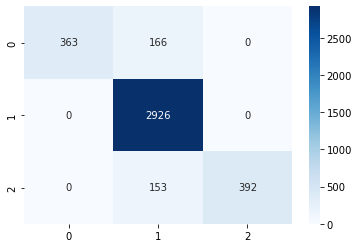

In [148]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_test_pred_MLP), annot=True, cmap='Blues', fmt='g')

In [169]:
clf.predict_proba(X_test)

array([[1.32139307e-03, 9.97694764e-01, 9.83843418e-04],
       [8.18627057e-04, 9.98553036e-01, 6.28336703e-04],
       [3.72651636e-03, 4.61989468e-03, 9.91653589e-01],
       ...,
       [7.97055240e-04, 9.98658649e-01, 5.44295935e-04],
       [7.07888890e-04, 9.98730416e-01, 5.61695131e-04],
       [1.43692230e-02, 9.74441433e-01, 1.11893438e-02]])

In [172]:
# ROC-AUC curve

from sklearn.metrics import roc_auc_score
roc_auc_score(y_score= clf.predict_proba(X_test), y_true= y_test, multi_class='ovr')

0.9545619720131171

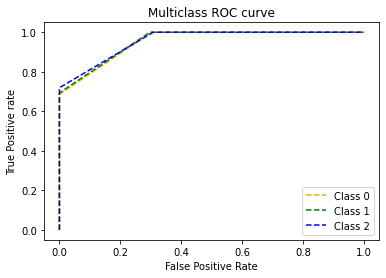

In [149]:
# importing libraries
# multi-class classification
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

pred_prob = clf.predict_proba(X_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
# plt.savefig('Multiclass ROC',dpi=300)

### Naive bayes

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

nb_classifier = GaussianNB()

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier, 
                 param_grid=params_NB,
                 verbose=1, 
                 scoring='accuracy') 
gs_NB.fit(X_train.todense(), y_train)

#print the tuned parameters
print("Tuned MLPClassifier Parameters: {}".format(gs_NB.best_params_))
print("Best score is {}".format(gs_NB.best_score_))



In [54]:
from sklearn.naive_bayes import GaussianNB
naive_model = GaussianNB()
naive_model.fit(X_train.toarray(), y_train)
y_test_pred_naive = naive_model.predict(X_test.toarray())
y_train_pred_naive = naive_model.predict(X_train.toarray())
print(accuracy_score(y_train, y_train_pred_naive))
print(accuracy_score(y_test, y_test_pred_naive))

0.9991875
0.73075


In [141]:
# Classification report

from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_pred_naive))
print(classification_report(y_test, y_test_pred_naive))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2173
           1       1.00      1.00      1.00     11775
           2       1.00      1.00      1.00      2052

    accuracy                           1.00     16000
   macro avg       1.00      1.00      1.00     16000
weighted avg       1.00      1.00      1.00     16000

              precision    recall  f1-score   support

           0       0.33      1.00      0.50       529
           1       1.00      0.69      0.82      2926
           2       1.00      0.72      0.84       545

    accuracy                           0.74      4000
   macro avg       0.78      0.80      0.72      4000
weighted avg       0.91      0.74      0.78      4000



<AxesSubplot:>

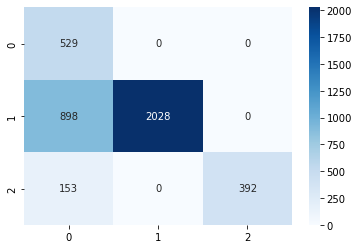

In [142]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_test_pred_naive), annot=True, cmap='Blues', fmt='g')

In [174]:
# ROC-AUC score

from sklearn.metrics import roc_auc_score
roc_auc_score(y_score= naive_model.predict_proba(X_test.toarray()), y_true= y_test, multi_class='ovr')

0.8848674322839543

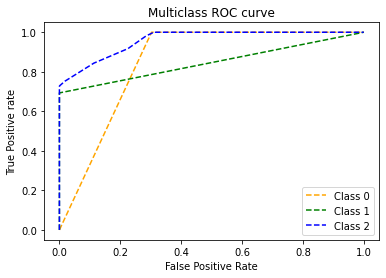

In [144]:
# importing libraries
# multi-class classification
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

pred_prob = naive_model.predict_proba(X_test.toarray())

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
# plt.savefig('Multiclass ROC',dpi=300)

### Support Vector Machines(SVM)

In [30]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# define model and parameters
model = SVC()
kernel = ['poly', 'rbf', 'sigmoid', 'linear']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']

# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


Best: 0.916625 using {'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}


In [31]:
from sklearn.svm import SVC
svm_model = SVC(C = 50, gamma = 'scale', kernel = 'rbf', probability = True)
svm_model.fit(X_train, y_train)
y_test_pred_SVM = svm_model.predict(X_test)
y_train_pred_SVM = svm_model.predict(X_train)
print(accuracy_score(y_train, y_train_pred_SVM))
print(accuracy_score(y_test, y_test_pred_SVM))

0.99975
0.92675


In [32]:
# Classification report

from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_pred_SVM))
print(classification_report(y_test, y_test_pred_SVM))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2168
           1       1.00      1.00      1.00     11935
           2       1.00      1.00      1.00      1897

    accuracy                           1.00     16000
   macro avg       1.00      1.00      1.00     16000
weighted avg       1.00      1.00      1.00     16000

              precision    recall  f1-score   support

           0       1.00      0.70      0.82       502
           1       0.91      1.00      0.95      3029
           2       0.99      0.71      0.82       469

    accuracy                           0.93      4000
   macro avg       0.97      0.80      0.87      4000
weighted avg       0.93      0.93      0.92      4000



In [133]:
print(len(y_test_pred_SVM),len(y_test))

4000 4000


In [134]:
y_test_pred_SVM.shape

(4000,)

<AxesSubplot:>

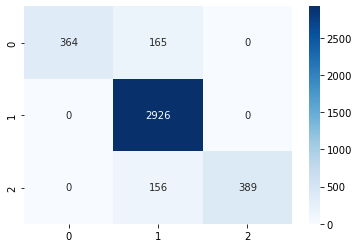

In [135]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_test_pred_SVM), annot=True, cmap='Blues', fmt='g')

In [175]:
# ROC-AUC score

from sklearn.metrics import roc_auc_score
roc_auc_score(y_score= svm_model.predict_proba(X_test), y_true= y_test, multi_class='ovr')

0.9561318335497342

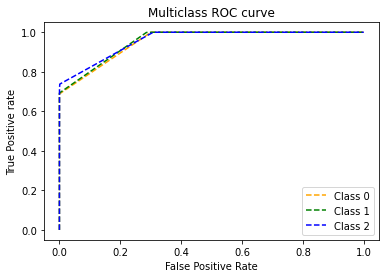

In [138]:
# importing libraries
# multi-class classification
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

pred_prob = svm_model.predict_proba(X_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
# plt.savefig('Multiclass ROC',dpi=300)

## Displaying all test and train accuracies

In [31]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["S.no", "Model", "Train_accuracy", "Test_accuracy"]
x.add_row(['1', 'Naive Bayes', accuracy_score(y_train, y_train_pred_naive), accuracy_score(y_test, y_test_pred_naive)])
x.add_row(['2', 'SVM', accuracy_score(y_train, y_train_pred_SVM), accuracy_score(y_test, y_test_pred_SVM)])
x.add_row(['3', 'MLP', accuracy_score(y_train, y_train_pred_MLP), accuracy_score(y_test, y_test_pred_MLP)])
x.add_row(['4', 'Decision Tree', accuracy_score(y_train, y_train_pred_dect), accuracy_score(y_test, y_test_pred_dect)])
print(x)

+------+---------------+----------------+---------------+
| S.no |     Model     | Train_accuracy | Test_accuracy |
+------+---------------+----------------+---------------+
|  1   |  Naive Bayes  |      1.0       |     0.7285    |
|  2   |      SVM      |      1.0       |     0.922     |
|  3   |      MLP      |   0.9998125    |      0.92     |
|  4   | Decision Tree |   0.7509375    |     0.7515    |
+------+---------------+----------------+---------------+


In [87]:
#predicting user input
print("Give atleast 8 characters")
inp = [input()]
#print(len(inp[0]))
if(len(inp[0]) > 7):

    inp = vectorizer_state.transform(inp)
    res=clf.predict(inp.todense())
    if res[0] == 0:
        print("your password was : Weak")
        print("Warning!!!! Please updtae the password with Special characters alpha numericals :(")
    elif res[0] ==1:
        print("Your password was : Moderate")
        print("Meets minimum stands advised to have a strong password :)")
    else :
        print("Your password was : Strong :>")
else:
    print("password length was less than 8 characters please check")

Give atleast 8 characters
lcopb334
Your password was : Moderate
Meets minimum stands advised to have a strong password :)


C:\Users\PunithaGnanathesigan\anaconda3\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
